In this notebook, we will explore some common techniques for visualizing relationships between variables in a dataset. 
1. One variable
    - Histograms (for large datasets)
    - Box/violin plots (to visualize distributions)
    - Kde plots (to visualize PDF's)
    - Swarm plots (for small datasets)
2. Special case: Time series data
    - Line plots (for stock prices, etc.)
3. Multiple continuous variables
    - Scatterplots (to visualize trends)
    - Pair plots (to visualize all possible scatterplots)
    - Joint plots (to visualize scatterplots with kde)
    - Heatmaps (to visualize correlation)
    
4. Mix of continuous/categorical variables
    - Box/violin plots (with color to represent categories)
    - Swarm plots (with color to represent categories)
    - Facet grids (to visualize multiple categories)
5. Special case: 3D data
    - 3D scatterplots

In [21]:
# import usual libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the style for the plots
sns.set_style('whitegrid')
sns.set_palette(['darkred', 'steelblue'])  # colors for 0 and 1 respectively

# read the presidential election data
election = pd.read_csv('../data/regression/presidential_election_popular_vote/train.csv')
election.head()

,fips,pop_tot,pop_male,pop_female,hispanic,labor_total,labor_armed,labor_employed,labor_unemployed,income_median,...,race_blk_female,race_other_total,race_other_male,race_other_female,area_sqmi,pop_density,year,dem,repub,other
0,5007,258980,128399,130581,42577,128941.0,100.0,125343.0,3498.0,64141.0,...,1957,27012,13954,13058,883.902,292.996282,2016,28005,60871,7948
1,19045,47218,23126,24092,1443,23715.0,10.0,22653.0,1052.0,50156.0,...,553,1681,691,990,710.172,66.488118,2016,10095,11276,1696
2,49009,612,359,253,20,260.0,0.0,257.0,3.0,81250.0,...,1,26,26,0,720.624,0.849264,2016,77,331,66
3,26031,25709,13072,12637,419,11243.0,58.0,10380.0,805.0,59557.0,...,22,2030,1031,999,885.394,29.036790,2020,5437,10186,245
4,48449,31301,15601,15700,14077,13924.0,0.0,13364.0,560.0,57634.0,...,1473,9296,4788,4508,425.641,73.538498,2020,2856,7570,115


In [22]:
election.columns

Index(['fips', 'pop_tot', 'pop_male', 'pop_female', 'hispanic', 'labor_total',
       'labor_armed', 'labor_employed', 'labor_unemployed', 'income_median',
       'income_percapita', 'income_poverty', 'native_yes', 'native_no',
       'houses_tot', 'income_10', 'income_10-15', 'income_15-25', 'income_25',
       'marital_single', 'marital_married', 'marital_sepdiv', 'marital_widow',
       'edu_low', 'edu_mid', 'edu_high', 'edu_low_age_18', 'edu_low_age_45',
       'edu_low_age_65', 'edu_mid_age_18', 'edu_mid_age_45', 'edu_mid_age_65',
       'edu_high_age_18', 'edu_high_age_45', 'edu_high_age_65',
       'race_wht_total', 'race_wht_male', 'race_wht_female', 'race_blk_total',
       'race_blk_male', 'race_blk_female', 'race_other_total',
       'race_other_male', 'race_other_female', 'area_sqmi', 'pop_density',
       'year', 'dem', 'repub', 'other'],
      dtype='object')

In [23]:
#add a column "y" which is 1 if dem > repub, 0 otherwise
election['y'] = (election['dem'] > election['repub']).astype(int)
election.sample(10)

,fips,pop_tot,pop_male,pop_female,hispanic,labor_total,labor_armed,labor_employed,labor_unemployed,income_median,...,race_other_total,race_other_male,race_other_female,area_sqmi,pop_density,year,dem,repub,other,y
3993,8007,12132,6116,6016,2209,6099.0,0.0,5538.0,561.0,48186.0,...,1438,655,783,1355.501,8.950196,2012,2679,3872,183,0
6164,24043,146329,74423,71906,4657,76336.0,259.0,71046.0,5031.0,52994.0,...,6257,3131,3126,457.780,319.649176,2008,26245,34169,1186,0
8928,34011,157429,81133,76296,44369,72184.0,75.0,62500.0,9609.0,50603.0,...,27728,14860,12868,677.617,232.327406,2012,34055,20658,579,1
3723,36093,153268,73966,79302,8033,78426.0,289.0,73149.0,4988.0,55188.0,...,14076,6873,7203,204.516,749.418138,2008,38611,29758,1409,1
3262,18129,26100,13020,13080,249,13930.0,0.0,13091.0,839.0,57530.0,...,545,230,315,409.571,63.725215,2008,5828,6804,139,0
429,23019,153627,75770,77857,1777,79257.0,273.0,72696.0,6288.0,44543.0,...,6184,3041,3143,3557.019,43.189817,2012,38811,36547,1948,1
1607,36049,27017,13580,13437,323,13184.0,172.0,12173.0,839.0,42846.0,...,387,205,182,1274.679,21.195140,2008,4986,5969,174,0
3326,28081,83343,39817,43526,2491,41026.0,243.0,38514.0,2269.0,64479.0,...,4888,2339,2549,453.173,183.909898,2020,12189,24207,558,0
8558,45007,204592,99223,105369,8570,98585.0,284.0,92914.0,5387.0,62347.0,...,14190,7265,6925,755.759,270.710637,2020,27169,67565,1359,0
3251,5047,18176,8822,9354,379,7923.0,37.0,7293.0,593.0,32064.0,...,744,234,510,608.857,29.852658,2008,1869,4411,195,0


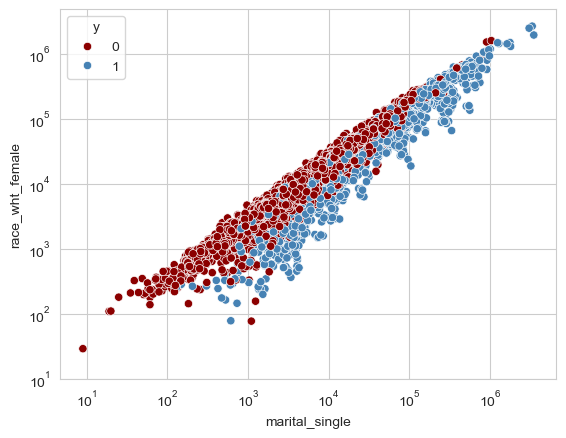

In [27]:
# plot a scatterplot of race_wht_female (y) against marital_single (x)
from matplotlib.pyplot import xscale


sns.scatterplot(data=election, x='marital_single', y='race_wht_female', hue='y')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
# add columns of percentages for all features starting with 'marital', 'race', 'edu'
for col in election.columns:
    if col.startswith('marital') or col.startswith('race') or col.startswith('edu'):
        election[col + '_percent'] = election[col] / election['pop_tot']

# scatterplot of marital single percent and race wht feamle percent
sns.scatterplot(data=election, x='marital_single_percent',y='race_wht_female_percent', hue='y', alpha=0.3)
plt.show()

In [32]:
shortlist = ['pop_density', 'edu_high_percent','edu_low_percent','income_median','marital_single_percent','race_wht_female_percent','race_blk_total_percent']

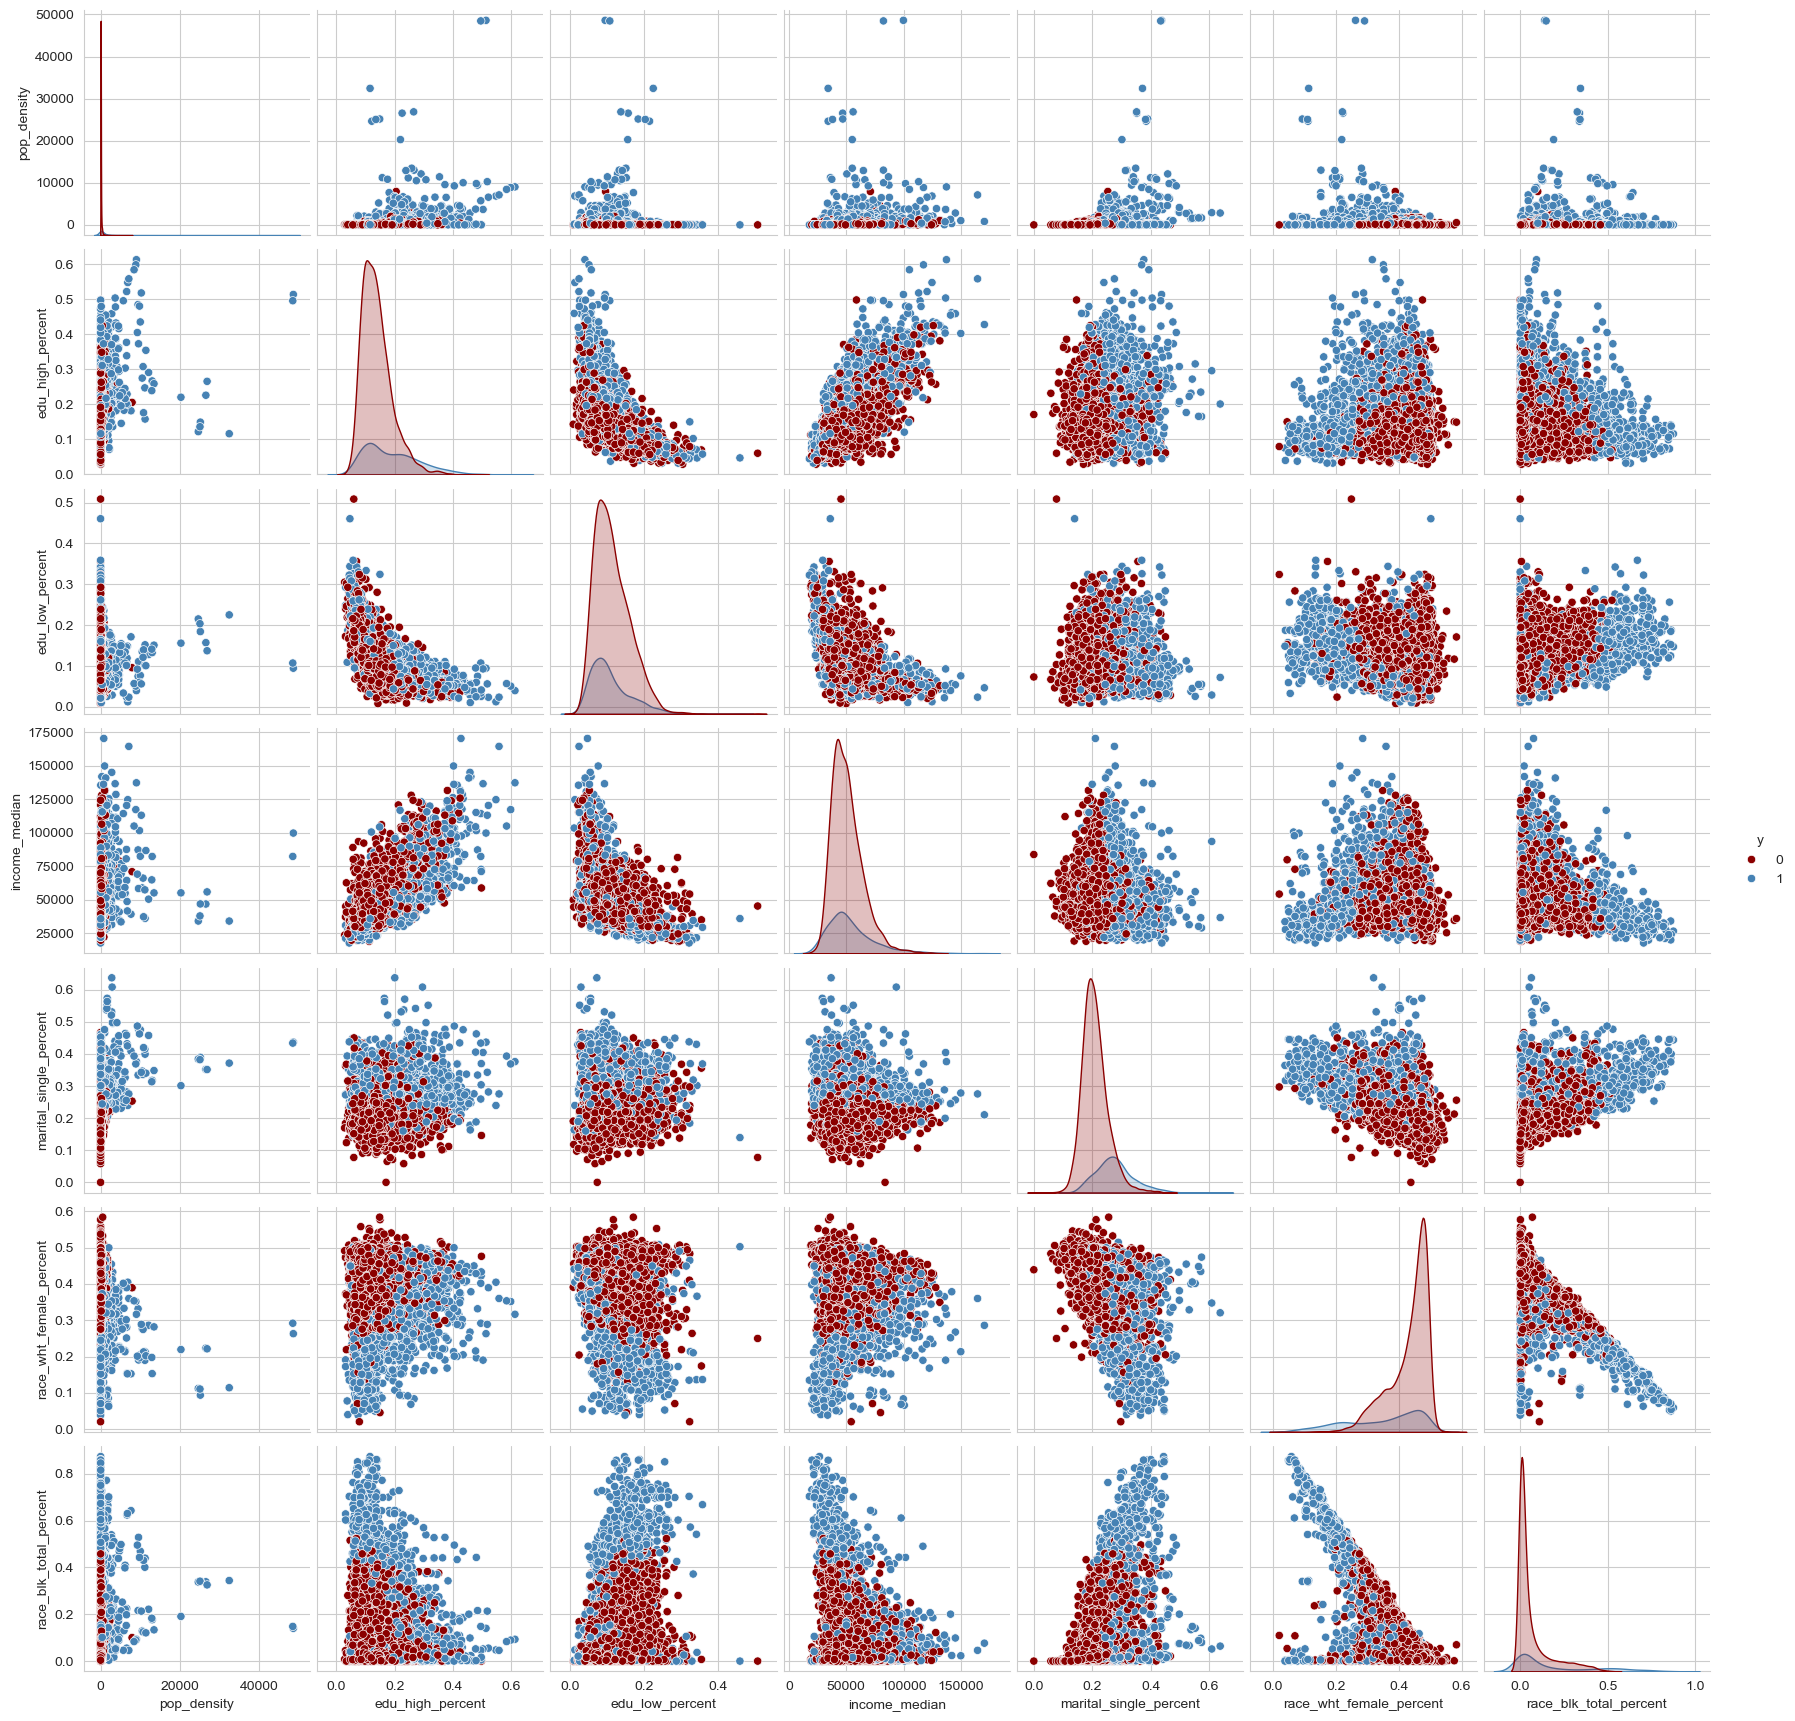

In [33]:
#pairplot of shortlist features
sns.pairplot(election, hue='y', vars=shortlist)
plt.show()

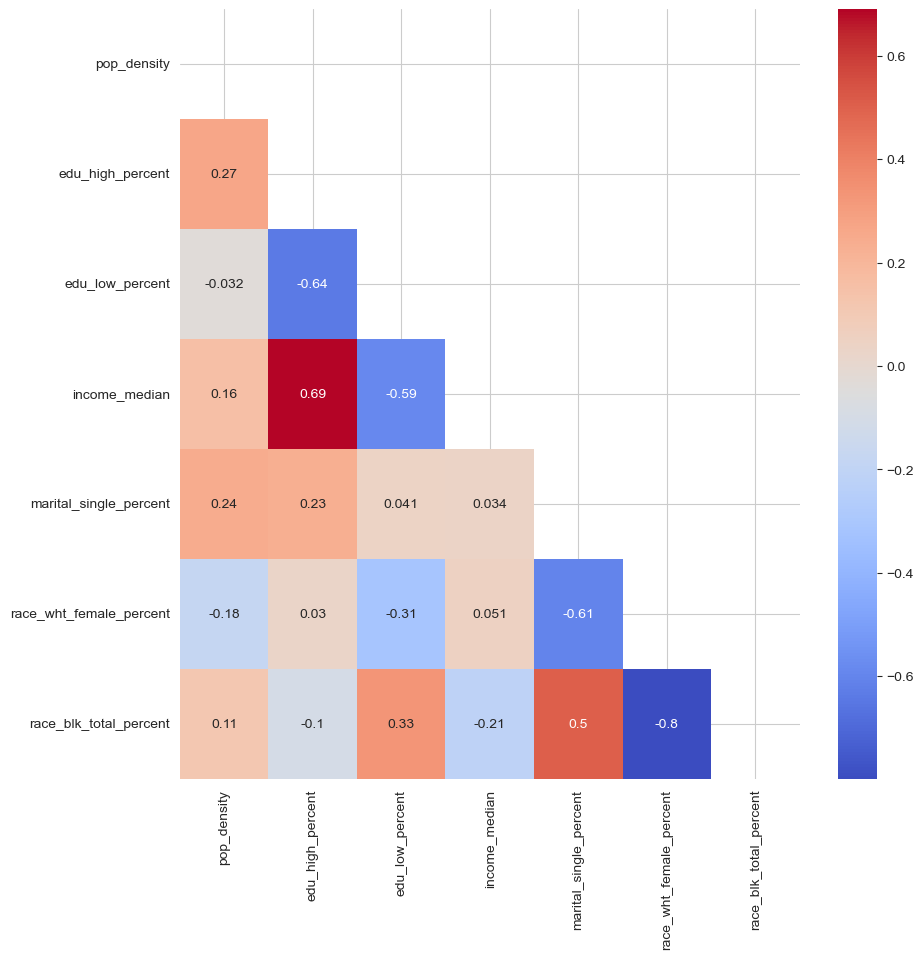

In [35]:
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(election[shortlist].corr()))
sns.heatmap(election[shortlist].corr(), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [ ]:
# import yfinance
import yfinance as yf
import warnings

warnings.filterwarnings('ignore', category=FutureWarning, 
                       message='The \'unit\' keyword in TimedeltaIndex construction is deprecated')

# Function to fetch stock data from Yahoo Finance
def fetch_stock_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    # Convert any time delta adjustments using pd.to_timedelta
    if data.index.tzinfo is not None:
        dst_error_hours = 1  # adjust as needed
        data.index += pd.to_timedelta(dst_error_hours, unit='h')
    return data

# Example usage
tickers = ['AAPL', 'ADBE', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NFLX', 'NVDA', 'PYPL', 'TSLA']
data = fetch_stock_data(tickers, '2022-01-01', '2025-01-01')

# Create a dictionary to store individual stock data
stocks = {}

# create dataframes for each type of data
df_adj_close = data['Adj Close']
df_open = data['Open']
df_high = data['High']
df_low = data['Low']
df_close = data['Close']
df_volume = data['Volume']

# Loop through each ticker and store its data as a df in the stocks dictionary
for ticker in tickers:
    df = pd.DataFrame({'Adj Close': df_adj_close[ticker],
                      'Open': df_open[ticker],
                      'High': df_high[ticker],
                      'Low': df_low[ticker],
                      'Close': df_close[ticker],
                      'Volume': df_volume[ticker]})
    stocks[ticker] = df

# Plot Microsoft's stock price
df_MSFT = stocks['MSFT']
plt.figure(figsize=(12, 6))
plt.plot(df_MSFT.index, df_MSFT['Adj Close'])
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
# import iris dataset
iris = pd.read_csv('../data/classification/iris/train.csv')
iris_vars = pd.read_csv('../data/classification/iris/data_description.csv')
iris_vars = iris_vars[['new_col_name', 'name', 'type', 'role']]
feature_map = dict(zip(iris_vars['new_col_name'], iris_vars['name']))

# create a palette of colors for the three values of Y
palette = sns.color_palette('Set2', n_colors=3)

fig, axes = plt.subplots(6,1, figsize=(5,30))

# List of variable pairs to plot
variable_pairs = [('X1', 'X2'), ('X1', 'X3'), ('X1', 'X4'), ('X2', 'X3'), ('X2', 'X4'), ('X3', 'X4')]

# Loop through each pair and create scatter plots
for i, (x_var, y_var) in enumerate(variable_pairs):
    sns.scatterplot(x=x_var, y=y_var, data=iris, hue='Y', palette=palette, ax=axes[i])
    axes[i].set_xlabel(feature_map[x_var])
    axes[i].set_ylabel(feature_map[y_var])

plt.tight_layout()
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# import iris dataset
iris = pd.read_csv('../data/classification/iris/train.csv')
iris_vars = pd.read_csv('../data/classification/iris/data_description.csv')
iris_vars = iris_vars[['new_col_name', 'name', 'type', 'role']]
feature_map = dict(zip(iris_vars['new_col_name'], iris_vars['name']))

def plot_3d_scatter(x_feature, y_feature, z_feature):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    scatter = ax.scatter(iris[x_feature], iris[y_feature], iris[z_feature],
                        c=pd.Categorical(iris['Y']).codes,
                        cmap=plt.cm.get_cmap('viridis'),
                        s=50)
    
    ax.set_xlabel(feature_map[x_feature])
    ax.set_ylabel(feature_map[y_feature])
    ax.set_zlabel(feature_map[z_feature])
    ax.set_title('3D Scatter Plot of Iris Features')
    
    legend1 = ax.legend(*scatter.legend_elements(),
                       title="Classes",
                       loc="center left",
                       bbox_to_anchor=(1.1, 0.5))
    ax.add_artist(legend1)
    plt.tight_layout()
    plt.show()

# Create dropdown widgets for feature selection
features = list(feature_map.keys())
x_dropdown = widgets.Dropdown(options=features, description='X axis:', value='X1')
y_dropdown = widgets.Dropdown(options=features, description='Y axis:', value='X2')
z_dropdown = widgets.Dropdown(options=features, description='Z axis:', value='X3')

# Create interactive plot
interactive_plot = widgets.interactive(plot_3d_scatter, 
                                     x_feature=x_dropdown,
                                     y_feature=y_dropdown,
                                     z_feature=z_dropdown)

display(interactive_plot)